In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import keras as kr

Using TensorFlow backend.


In [2]:
x_raw = np.arange(10000, step=10, dtype=np.float32) / 500
y_raw = np.sin(x_raw)

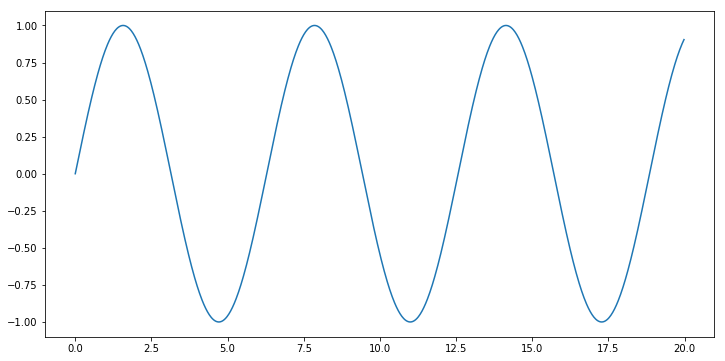

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(x_raw, y_raw)
plt.show()

In [4]:
ts_length = 10
num_samples = 100

In [5]:
data_x = np.zeros(shape=(num_samples, ts_length), dtype=np.float32)
data_y = np.zeros(shape=(num_samples,), dtype=np.float32)

In [6]:
rand_idx = np.random.choice(np.arange(num_samples - ts_length, dtype=np.int64), size=num_samples)
for i, idx in enumerate(rand_idx):
    data_x[i] = y_raw[idx:idx + ts_length]
    data_y[i] = y_raw[idx + ts_length]

In [7]:
class LSTM:
    def __init__(self, ts_length, gate_size, dense_layer_size, num_layers, dropout_keep_prob=1):
        input_x = kr.Input(shape=(ts_length, 1), dtype=np.float32)
        output = None
        for layer_idx in range(num_layers):
            return_sequences = (layer_idx < num_layers - 1)
            lstm_cell = kr.layers.LSTM(gate_size, return_sequences=return_sequences)
            if layer_idx == 0:
                output = lstm_cell(input_x)
            else:
                output = lstm_cell(output)
            if dropout_keep_prob < 1:
                output = kr.layers.Dropout(dropout_keep_prob)(output)
        if dense_layer_size is not None and dense_layer_size > 1:
            output = kr.layers.Dense(dense_layer_size)(output)
        output = kr.layers.Dense(1)(output)
        self._model = kr.Model(inputs=input_x, outputs=output)
        self._model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

    @property
    def model_summary(self):
        return self._model.summary()

    def fit(self, x, y, num_epoch, batch_size):
        return self._model.fit(x, y, epochs=num_epoch, batch_size=batch_size, shuffle=True)
        
    def predict(self, *args, **kwargs):
        return self._model.predict(*args, **kwargs)
    
    def evaluate(self, *args, **kwargs):
        return self._model.evaluate(*args, **kwargs)

In [8]:
model = LSTM(
    ts_length=ts_length,
    gate_size=128,
    dense_layer_size=32,
    num_layers=3
)

In [9]:
model.model_summary

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10, 1)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 128)           66560     
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 128)           131584    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 333,889
Trainable params: 333,889
Non-trainable params: 0
_________________________________________________________________


In [10]:
test_sample_size = int(num_samples * 0.2)

In [11]:
model.fit(data_x[:-test_sample_size].reshape(
    num_samples - test_sample_size,
    ts_length,
    1
), data_y[:-test_sample_size], num_epoch=1000, batch_size=num_samples)

Epoch 1/1000
80/80 [==============================] - 1s 17ms/step - loss: 0.6046 - mean_squared_error: 0.6046
Epoch 2/1000
80/80 [==============================] - 0s 351us/step - loss: 0.4445 - mean_squared_error: 0.4445
Epoch 3/1000
80/80 [==============================] - 0s 369us/step - loss: 0.2831 - mean_squared_error: 0.2831
Epoch 4/1000
80/80 [==============================] - 0s 363us/step - loss: 0.1180 - mean_squared_error: 0.1180
Epoch 5/1000
80/80 [==============================] - 0s 376us/step - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 6/1000
80/80 [==============================] - 0s 376us/step - loss: 0.0923 - mean_squared_error: 0.0923
Epoch 7/1000
80/80 [==============================] - 0s 376us/step - loss: 0.1170 - mean_squared_error: 0.1170
Epoch 8/1000
80/80 [==============================] - 0s 376us/step - loss: 0.0410 - mean_squared_error: 0.0410
Epoch 9/1000
80/80 [==============================] - 0s 394us/step - loss: 0.0019 - mean_squared_error: 

Epoch 73/1000
80/80 [==============================] - 0s 394us/step - loss: 4.7425e-04 - mean_squared_error: 4.7425e-04
Epoch 74/1000
80/80 [==============================] - 0s 401us/step - loss: 4.5273e-04 - mean_squared_error: 4.5273e-04
Epoch 75/1000
80/80 [==============================] - 0s 382us/step - loss: 4.7462e-04 - mean_squared_error: 4.7462e-04
Epoch 76/1000
80/80 [==============================] - 0s 388us/step - loss: 5.1004e-04 - mean_squared_error: 5.1004e-04
Epoch 77/1000
80/80 [==============================] - 0s 394us/step - loss: 5.2213e-04 - mean_squared_error: 5.2213e-04
Epoch 78/1000
80/80 [==============================] - 0s 388us/step - loss: 5.0113e-04 - mean_squared_error: 5.0113e-04
Epoch 79/1000
80/80 [==============================] - 0s 376us/step - loss: 4.6881e-04 - mean_squared_error: 4.6881e-04
Epoch 80/1000
80/80 [==============================] - 0s 388us/step - loss: 4.5328e-04 - mean_squared_error: 4.5328e-04
Epoch 81/1000
80/80 [===========

Epoch 141/1000
80/80 [==============================] - 0s 394us/step - loss: 4.0663e-04 - mean_squared_error: 4.0663e-04
Epoch 142/1000
80/80 [==============================] - 0s 401us/step - loss: 4.0593e-04 - mean_squared_error: 4.0593e-04
Epoch 143/1000
80/80 [==============================] - 0s 388us/step - loss: 4.0528e-04 - mean_squared_error: 4.0528e-04
Epoch 144/1000
80/80 [==============================] - 0s 388us/step - loss: 4.0465e-04 - mean_squared_error: 4.0465e-04
Epoch 145/1000
80/80 [==============================] - 0s 382us/step - loss: 4.0399e-04 - mean_squared_error: 4.0399e-04
Epoch 146/1000
80/80 [==============================] - 0s 388us/step - loss: 4.0329e-04 - mean_squared_error: 4.0329e-04
Epoch 147/1000
80/80 [==============================] - 0s 382us/step - loss: 4.0260e-04 - mean_squared_error: 4.0260e-04
Epoch 148/1000
80/80 [==============================] - 0s 382us/step - loss: 4.0194e-04 - mean_squared_error: 4.0194e-04
Epoch 149/1000
80/80 [==

Epoch 209/1000
80/80 [==============================] - 0s 401us/step - loss: 3.6259e-04 - mean_squared_error: 3.6259e-04
Epoch 210/1000
80/80 [==============================] - 0s 401us/step - loss: 3.6198e-04 - mean_squared_error: 3.6198e-04
Epoch 211/1000
80/80 [==============================] - 0s 407us/step - loss: 3.6137e-04 - mean_squared_error: 3.6137e-04
Epoch 212/1000
80/80 [==============================] - 0s 382us/step - loss: 3.6076e-04 - mean_squared_error: 3.6076e-04
Epoch 213/1000
80/80 [==============================] - 0s 382us/step - loss: 3.6016e-04 - mean_squared_error: 3.6016e-04
Epoch 214/1000
80/80 [==============================] - 0s 382us/step - loss: 3.5955e-04 - mean_squared_error: 3.5955e-04
Epoch 215/1000
80/80 [==============================] - 0s 376us/step - loss: 3.5895e-04 - mean_squared_error: 3.5895e-04
Epoch 216/1000
80/80 [==============================] - 0s 376us/step - loss: 3.5835e-04 - mean_squared_error: 3.5835e-04
Epoch 217/1000
80/80 [==

Epoch 277/1000
80/80 [==============================] - 0s 369us/step - loss: 3.2498e-04 - mean_squared_error: 3.2498e-04
Epoch 278/1000
80/80 [==============================] - 0s 388us/step - loss: 3.2449e-04 - mean_squared_error: 3.2449e-04
Epoch 279/1000
80/80 [==============================] - 0s 382us/step - loss: 3.2401e-04 - mean_squared_error: 3.2401e-04
Epoch 280/1000
80/80 [==============================] - 0s 369us/step - loss: 3.2353e-04 - mean_squared_error: 3.2353e-04
Epoch 281/1000
80/80 [==============================] - 0s 370us/step - loss: 3.2305e-04 - mean_squared_error: 3.2305e-04
Epoch 282/1000
80/80 [==============================] - 0s 376us/step - loss: 3.2257e-04 - mean_squared_error: 3.2257e-04
Epoch 283/1000
80/80 [==============================] - 0s 376us/step - loss: 3.2210e-04 - mean_squared_error: 3.2210e-04
Epoch 284/1000
80/80 [==============================] - 0s 382us/step - loss: 3.2162e-04 - mean_squared_error: 3.2162e-04
Epoch 285/1000
80/80 [==

Epoch 345/1000
80/80 [==============================] - 0s 444us/step - loss: 2.9685e-04 - mean_squared_error: 2.9685e-04
Epoch 346/1000
80/80 [==============================] - 0s 413us/step - loss: 2.9651e-04 - mean_squared_error: 2.9651e-04
Epoch 347/1000
80/80 [==============================] - 0s 407us/step - loss: 2.9618e-04 - mean_squared_error: 2.9618e-04
Epoch 348/1000
80/80 [==============================] - 0s 457us/step - loss: 2.9584e-04 - mean_squared_error: 2.9584e-04
Epoch 349/1000
80/80 [==============================] - 0s 407us/step - loss: 2.9551e-04 - mean_squared_error: 2.9551e-04
Epoch 350/1000
80/80 [==============================] - 0s 388us/step - loss: 2.9518e-04 - mean_squared_error: 2.9518e-04
Epoch 351/1000
80/80 [==============================] - 0s 432us/step - loss: 2.9485e-04 - mean_squared_error: 2.9485e-04
Epoch 352/1000
80/80 [==============================] - 0s 426us/step - loss: 2.9452e-04 - mean_squared_error: 2.9452e-04
Epoch 353/1000
80/80 [==

Epoch 413/1000
80/80 [==============================] - 0s 357us/step - loss: 2.7832e-04 - mean_squared_error: 2.7832e-04
Epoch 414/1000
80/80 [==============================] - 0s 376us/step - loss: 2.7811e-04 - mean_squared_error: 2.7811e-04
Epoch 415/1000
80/80 [==============================] - 0s 376us/step - loss: 2.7790e-04 - mean_squared_error: 2.7790e-04
Epoch 416/1000
80/80 [==============================] - 0s 369us/step - loss: 2.7769e-04 - mean_squared_error: 2.7769e-04
Epoch 417/1000
80/80 [==============================] - 0s 369us/step - loss: 2.7749e-04 - mean_squared_error: 2.7749e-04
Epoch 418/1000
80/80 [==============================] - 0s 357us/step - loss: 2.7729e-04 - mean_squared_error: 2.7729e-04
Epoch 419/1000
80/80 [==============================] - 0s 363us/step - loss: 2.7709e-04 - mean_squared_error: 2.7709e-04
Epoch 420/1000
80/80 [==============================] - 0s 363us/step - loss: 2.7689e-04 - mean_squared_error: 2.7689e-04
Epoch 421/1000
80/80 [==

Epoch 481/1000
80/80 [==============================] - 0s 382us/step - loss: 2.6745e-04 - mean_squared_error: 2.6745e-04
Epoch 482/1000
80/80 [==============================] - 0s 382us/step - loss: 2.6733e-04 - mean_squared_error: 2.6733e-04
Epoch 483/1000
80/80 [==============================] - 0s 376us/step - loss: 2.6722e-04 - mean_squared_error: 2.6722e-04
Epoch 484/1000
80/80 [==============================] - 0s 369us/step - loss: 2.6710e-04 - mean_squared_error: 2.6710e-04
Epoch 485/1000
80/80 [==============================] - 0s 369us/step - loss: 2.6699e-04 - mean_squared_error: 2.6699e-04
Epoch 486/1000
80/80 [==============================] - 0s 363us/step - loss: 2.6688e-04 - mean_squared_error: 2.6688e-04
Epoch 487/1000
80/80 [==============================] - 0s 369us/step - loss: 2.6676e-04 - mean_squared_error: 2.6676e-04
Epoch 488/1000
80/80 [==============================] - 0s 370us/step - loss: 2.6665e-04 - mean_squared_error: 2.6665e-04
Epoch 489/1000
80/80 [==

Epoch 549/1000
80/80 [==============================] - 0s 369us/step - loss: 2.6155e-04 - mean_squared_error: 2.6155e-04
Epoch 550/1000
80/80 [==============================] - 0s 363us/step - loss: 2.6148e-04 - mean_squared_error: 2.6148e-04
Epoch 551/1000
80/80 [==============================] - 0s 363us/step - loss: 2.6142e-04 - mean_squared_error: 2.6142e-04
Epoch 552/1000
80/80 [==============================] - 0s 369us/step - loss: 2.6136e-04 - mean_squared_error: 2.6136e-04
Epoch 553/1000
80/80 [==============================] - 0s 369us/step - loss: 2.6130e-04 - mean_squared_error: 2.6130e-04
Epoch 554/1000
80/80 [==============================] - 0s 376us/step - loss: 2.6124e-04 - mean_squared_error: 2.6124e-04
Epoch 555/1000
80/80 [==============================] - 0s 382us/step - loss: 2.6118e-04 - mean_squared_error: 2.6118e-04
Epoch 556/1000
80/80 [==============================] - 0s 376us/step - loss: 2.6112e-04 - mean_squared_error: 2.6112e-04
Epoch 557/1000
80/80 [==

Epoch 617/1000
80/80 [==============================] - 0s 394us/step - loss: 2.5826e-04 - mean_squared_error: 2.5826e-04
Epoch 618/1000
80/80 [==============================] - 0s 363us/step - loss: 2.5822e-04 - mean_squared_error: 2.5822e-04
Epoch 619/1000
80/80 [==============================] - 0s 369us/step - loss: 2.5818e-04 - mean_squared_error: 2.5818e-04
Epoch 620/1000
80/80 [==============================] - 0s 369us/step - loss: 2.5814e-04 - mean_squared_error: 2.5814e-04
Epoch 621/1000
80/80 [==============================] - 0s 363us/step - loss: 2.5811e-04 - mean_squared_error: 2.5811e-04
Epoch 622/1000
80/80 [==============================] - 0s 355us/step - loss: 2.5807e-04 - mean_squared_error: 2.5807e-04
Epoch 623/1000
80/80 [==============================] - 0s 376us/step - loss: 2.5803e-04 - mean_squared_error: 2.5803e-04
Epoch 624/1000
80/80 [==============================] - 0s 363us/step - loss: 2.5800e-04 - mean_squared_error: 2.5800e-04
Epoch 625/1000
80/80 [==

Epoch 685/1000
80/80 [==============================] - 0s 363us/step - loss: 2.5606e-04 - mean_squared_error: 2.5606e-04
Epoch 686/1000
80/80 [==============================] - 0s 363us/step - loss: 2.5603e-04 - mean_squared_error: 2.5603e-04
Epoch 687/1000
80/80 [==============================] - 0s 363us/step - loss: 2.5600e-04 - mean_squared_error: 2.5600e-04
Epoch 688/1000
80/80 [==============================] - 0s 363us/step - loss: 2.5597e-04 - mean_squared_error: 2.5597e-04
Epoch 689/1000
80/80 [==============================] - 0s 369us/step - loss: 2.5594e-04 - mean_squared_error: 2.5594e-04
Epoch 690/1000
80/80 [==============================] - 0s 382us/step - loss: 2.5591e-04 - mean_squared_error: 2.5591e-04
Epoch 691/1000
80/80 [==============================] - 0s 363us/step - loss: 2.5588e-04 - mean_squared_error: 2.5588e-04
Epoch 692/1000
80/80 [==============================] - 0s 363us/step - loss: 2.5586e-04 - mean_squared_error: 2.5586e-04
Epoch 693/1000
80/80 [==

Epoch 753/1000
80/80 [==============================] - 0s 407us/step - loss: 2.5417e-04 - mean_squared_error: 2.5417e-04
Epoch 754/1000
80/80 [==============================] - 0s 401us/step - loss: 2.5414e-04 - mean_squared_error: 2.5414e-04
Epoch 755/1000
80/80 [==============================] - 0s 382us/step - loss: 2.5411e-04 - mean_squared_error: 2.5411e-04
Epoch 756/1000
80/80 [==============================] - 0s 394us/step - loss: 2.5408e-04 - mean_squared_error: 2.5408e-04
Epoch 757/1000
80/80 [==============================] - 0s 401us/step - loss: 2.5406e-04 - mean_squared_error: 2.5406e-04
Epoch 758/1000
80/80 [==============================] - 0s 388us/step - loss: 2.5403e-04 - mean_squared_error: 2.5403e-04
Epoch 759/1000
80/80 [==============================] - 0s 401us/step - loss: 2.5400e-04 - mean_squared_error: 2.5400e-04
Epoch 760/1000
80/80 [==============================] - 0s 394us/step - loss: 2.5397e-04 - mean_squared_error: 2.5397e-04
Epoch 761/1000
80/80 [==

Epoch 821/1000
80/80 [==============================] - 0s 407us/step - loss: 2.5225e-04 - mean_squared_error: 2.5225e-04
Epoch 822/1000
80/80 [==============================] - 0s 407us/step - loss: 2.5222e-04 - mean_squared_error: 2.5222e-04
Epoch 823/1000
80/80 [==============================] - 0s 401us/step - loss: 2.5219e-04 - mean_squared_error: 2.5219e-04
Epoch 824/1000
80/80 [==============================] - 0s 407us/step - loss: 2.5216e-04 - mean_squared_error: 2.5216e-04
Epoch 825/1000
80/80 [==============================] - 0s 388us/step - loss: 2.5213e-04 - mean_squared_error: 2.5213e-04
Epoch 826/1000
80/80 [==============================] - 0s 394us/step - loss: 2.5210e-04 - mean_squared_error: 2.5210e-04
Epoch 827/1000
80/80 [==============================] - 0s 388us/step - loss: 2.5207e-04 - mean_squared_error: 2.5207e-04
Epoch 828/1000
80/80 [==============================] - 0s 388us/step - loss: 2.5204e-04 - mean_squared_error: 2.5204e-04
Epoch 829/1000
80/80 [==

Epoch 889/1000
80/80 [==============================] - 0s 413us/step - loss: 2.5016e-04 - mean_squared_error: 2.5016e-04
Epoch 890/1000
80/80 [==============================] - 0s 401us/step - loss: 2.5013e-04 - mean_squared_error: 2.5013e-04
Epoch 891/1000
80/80 [==============================] - 0s 394us/step - loss: 2.5009e-04 - mean_squared_error: 2.5009e-04
Epoch 892/1000
80/80 [==============================] - 0s 388us/step - loss: 2.5006e-04 - mean_squared_error: 2.5006e-04
Epoch 893/1000
80/80 [==============================] - 0s 382us/step - loss: 2.5003e-04 - mean_squared_error: 2.5003e-04
Epoch 894/1000
80/80 [==============================] - 0s 394us/step - loss: 2.4999e-04 - mean_squared_error: 2.4999e-04
Epoch 895/1000
80/80 [==============================] - 0s 394us/step - loss: 2.4996e-04 - mean_squared_error: 2.4996e-04
Epoch 896/1000
80/80 [==============================] - 0s 382us/step - loss: 2.4993e-04 - mean_squared_error: 2.4993e-04
Epoch 897/1000
80/80 [==

Epoch 957/1000
80/80 [==============================] - 0s 413us/step - loss: 2.4780e-04 - mean_squared_error: 2.4780e-04
Epoch 958/1000
80/80 [==============================] - 0s 401us/step - loss: 2.4776e-04 - mean_squared_error: 2.4776e-04
Epoch 959/1000
80/80 [==============================] - 0s 401us/step - loss: 2.4773e-04 - mean_squared_error: 2.4773e-04
Epoch 960/1000
80/80 [==============================] - 0s 376us/step - loss: 2.4769e-04 - mean_squared_error: 2.4769e-04
Epoch 961/1000
80/80 [==============================] - 0s 382us/step - loss: 2.4765e-04 - mean_squared_error: 2.4765e-04
Epoch 962/1000
80/80 [==============================] - 0s 388us/step - loss: 2.4761e-04 - mean_squared_error: 2.4761e-04
Epoch 963/1000
80/80 [==============================] - 0s 388us/step - loss: 2.4758e-04 - mean_squared_error: 2.4758e-04
Epoch 964/1000
80/80 [==============================] - 0s 382us/step - loss: 2.4754e-04 - mean_squared_error: 2.4754e-04
Epoch 965/1000
80/80 [==

In [12]:
model.evaluate(data_x[-test_sample_size:].reshape(test_sample_size, ts_length, 1), data_y[-test_sample_size:])

20/20 [==============================] - 0s 9ms/step


[0.00026282231556251645, 0.00026282231556251645]

In [13]:
generated_test_size = 1000
test_set_xy = np.zeros(shape=(generated_test_size, ts_length + 1), dtype=np.float32)
for i in range(generated_test_size):
    test_set_xy[i] = np.sin(np.arange(i, i + ts_length + 1, dtype=np.float32) / 50)
test_set_x = test_set_xy[:, :-1]
test_set_y = test_set_xy[:, -1]
prediction = model.predict(test_set_x.reshape(generated_test_size, ts_length, 1))

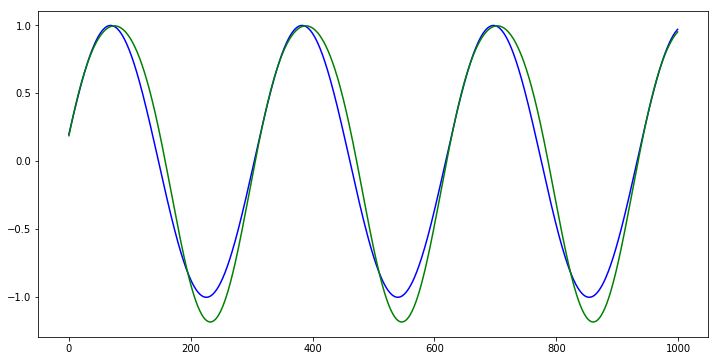

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(test_set_y, color='b')
plt.plot(prediction, color='g')
plt.show()